# Binary Classification

# Libraries

In [1]:
import sys
import os
from os import path
import argparse

#Numerical Manipulation
import random
import array
from random import shuffle
import numpy as np
import pandas as pd

#tools
import shutil #file processing
from glob import glob #find pathnames
import itertools
import gc #garbage collector
import json #notation

# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import class_weight as cw
from sklearn.utils import shuffle

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Machine Learning Evaluation
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# Deep Learning - Keras -  Preprocessing
from keras.preprocessing.image import ImageDataGenerator

# Deep Learning - Keras - Model
import keras
from keras import models
from keras.models import Model
from keras.models import Sequential

# Deep Learning - Keras - Layers
from keras.layers import Convolution1D, concatenate, SpatialDropout1D, GlobalMaxPool1D, GlobalAvgPool1D, Embedding, \
    Conv2D, SeparableConv1D, Add, BatchNormalization, Activation, GlobalAveragePooling2D, LeakyReLU, Flatten
from keras.layers import Dense, Input, Dropout, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D
#from keras.layers.pooling import _GlobalPooling1D

# Deep Learning - Keras - Pretrained Model 
from keras.applications.xception import Xception
#from keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.applications.nasnet import NASNetMobile, NASNetLarge
from tensorflow.keras.applications.nasnet import preprocess_input

# Deep Learning - Keras - Evaluation
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam, SGD , RMSprop
from tensorflow.keras.losses import mae, sparse_categorical_crossentropy, binary_crossentropy

# Deep Learning - Keras - Visualization
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
# from keras.wrappers.scikit_learn import KerasClassifier
from keras import backend as K

# Deep Learning - TensorFlow
import tensorflow as tf

# Graphing/ Visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
import seaborn as sns
#from mlxtend.plotting import plot_confusion_matrix

# Image
#import cv2
from PIL import Image
from IPython.display import display
#from wordcloud import WordCloud, STOPWORDS

# 1. Set I/O

In [2]:
#Libraries
import sys
import os
from os import path
import argparse

#input folders
cur_dir = os.getcwd()
train_dir = cur_dir + r"/input/train"
test_dir = cur_dir + r"/input/test"
Subfolder_numbers = 7

print (train_dir)
print (test_dir)

#output folders
output_dir = '/Users/sophiaty/Desktop/SRA Codes/Subset 1 - Binary Classification/output/'
figure_dir = '/Users/sophiaty/Desktop/SRA Codes/Subset 1 - Binary Classification/output/figures'

#Check output folders
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    
if not os.path.exists(figure_dir):
    os.mkdir(figure_dir)
    
#prepare files
fname_predict_batch = figure_dir+r"/result"
fname_predict_sample = figure_dir+r"/sample"

/Users/sophiaty/Desktop/SRA Codes/Subset 1 - Binary Classification/input/train
/Users/sophiaty/Desktop/SRA Codes/Subset 1 - Binary Classification/input/test


# 2. Get filenames and parse strings

## Function

In [3]:
#Function to parse files
def data_parser(image_dir, X, i, FNAME, TISSUE, T_CLASS, Subfolder_numbers):
    basepath = Path(image_dir)
    files_in_basepath = basepath.iterdir()
    for item in files_in_basepath:
        i = i+1
        if item.is_file():
            X = os.path.splitext(item)
            strng = X[0]
            cut = strng.split('/') #remove input and test/train directory
            fname = cut[Subfolder_numbers + 1] #get filename
            if ".DS" not in fname:
                FNAME.append(fname)
                tissue = fname.split('_')
                if "HF" in tissue[0] or "hF" in tissue[0] or "hf" in tissue[0] or "Hf" in tissue[0]:
                        TISSUE.append('HF')
                        T_CLASS.append(1)
                else:
                    TISSUE.append(tissue[0])
                    T_CLASS.append(0)
            else:
                continue
            i = i+1 

    FNAME = np.array(FNAME)
    TISSUE = np.array(TISSUE)
    T_CLASS = np.array(T_CLASS)
    print(len(FNAME))
    
    return(FNAME, TISSUE, T_CLASS)

## Call Function

In [4]:
#Libraries
from pathlib import Path
import numpy as np
import array

image_dir = r'all images'
X = [] #splicer
i = 0 #iterator

#Training Headers
train_FNAME = []
train_TISSUE = []
train_CLASS = []

train_arrays = data_parser(train_dir, X, i, train_FNAME, train_TISSUE, train_CLASS, Subfolder_numbers)

#Testing Headers
test_FNAME = []
test_TISSUE = []
test_CLASS = []

test_arrays = data_parser(test_dir, X, i, test_FNAME, test_TISSUE, test_CLASS, Subfolder_numbers)

50
25


# 3. Create CSV file

## Training Set Label

In [5]:
#Library
import csv

with open ('train_labels.csv', mode = 'w') as csv_file:
    fieldnames = ['Filename', 'Tissues', 'Binary Class']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()

for i in range (len(train_FNAME)):
    with open('train_labels.csv', mode='a') as csv_file:
        fieldnames = ['Filename', 'Tissues', 'Binary Class']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writerow({ 'Filename': train_FNAME[i], 'Tissues': train_TISSUE[i], 'Binary Class' : train_CLASS[i]})

csv_file.close()

## Testing Set Labels

In [6]:
with open ('test_labels.csv', mode = "w") as test_file:
    fieldnames = ['Filename', 'Tissues', 'Binary Class']
    writer = csv.DictWriter(test_file, fieldnames=fieldnames)
    writer.writeheader()
    
for i in range (len(test_FNAME)):
    with open ('test_labels.csv', mode = 'a') as test_file:
        fieldnames = ['Filename', 'Tissues', 'Binary Class']
        writer = csv.DictWriter(test_file, fieldnames=fieldnames)
        writer.writerow({ 'Filename': test_FNAME[i], 'Tissues': test_TISSUE[i], 'Binary Class' : test_CLASS[i]})

test_file.close()
        

# 4. Preprocessing

## Training 

In [7]:
import pandas as pd 

m = {0:'Non HF', 1:'HF'}
target_dir = os.getcwd()

train_df = pd.read_csv(target_dir+"/train_labels.csv")
train_df['Filename'] = train_df['Filename'].apply(lambda x:x+".png")
train_df['Binary Class'] = train_df['Binary Class'].map(m)
train_df.head()

,Filename,Tissues,Binary Class
0,BCC_14 copy.png,BCC,Non HF
1,BCC_15 copy.png,BCC,Non HF
2,HF_09 copy.png,HF,HF
3,BCC_20 copy.png,BCC,Non HF
4,BCC_21 copy.png,BCC,Non HF


In [8]:
test_df = pd.read_csv(target_dir+"/test_labels.csv")
test_df['Filename'] = test_df['Filename'].apply(lambda x:x+".png")
test_df['Binary Class'] = test_df['Binary Class'].map(m)
test_df.head()

,Filename,Tissues,Binary Class
0,HF_36 copy.png,HF,HF
1,BCC_37 copy.png,BCC,Non HF
2,BCC_36 copy.png,BCC,Non HF
3,BCC_40 copy.png,BCC,Non HF
4,BCC_41 copy.png,BCC,Non HF


## Pretraining Functions

In [9]:
#this performs data augmentation built in keras
#this also changes the weights
def get_data(batch_size=32, target_size=(299, 299), class_mode="categorical", training_dir=train_dir, testing_dir=test_dir):
    print("Generating data following preprocessing...\n")
    
    rescale = 1.0/255

    train_batch_size = batch_size
    test_batch_size = batch_size
    
    train_shuffle = True
    val_shuffle = True
    test_shuffle = False
    
    train_datagen = ImageDataGenerator(
        horizontal_flip=True,
        vertical_flip=True,
        rotation_range=45,
        shear_range=16,
        rescale=rescale,
        validation_split=0.25)

    train_generator = train_datagen.flow_from_dataframe(
        train_df, 
        training_dir,
        x_col='Filename',
        y_col='Binary Class',
        target_size=target_size, 
        class_mode=class_mode, 
        batch_size=batch_size, 
        shuffle=True, 
        seed=42,
        subset='training')
    
    validation_generator = train_datagen.flow_from_dataframe(
        train_df, 
        training_dir,
        x_col='Filename',
        y_col='Binary Class',  
        target_size=target_size, 
        class_mode=class_mode, 
        batch_size=batch_size, 
        shuffle=True, 
        seed=42,
        subset='validation')
    
    test_datagen = ImageDataGenerator(rescale=rescale)
    
    test_generator = test_datagen.flow_from_dataframe(
        test_df, 
        testing_dir,
        x_col='Filename',
        y_col='Binary Class',
        target_size=target_size, 
        class_mode=class_mode, 
        batch_size=1024, 
        shuffle=False, 
        seed=42)
    
    #this modifies the training set
    class_weights = get_weight(train_generator.classes)
    
    steps_per_epoch = len(train_generator)
    validation_steps = len(validation_generator)
    
    print("\nData batches generated.\n")
    
    
    return train_generator, validation_generator, test_generator, class_weights, steps_per_epoch, validation_steps


def get_weight(y):
    class_weight_current =  cw.compute_class_weight('balanced', np.unique(y), y)
    return class_weight_current


# 5. Model Function

In [10]:
#GET MODEL 

def get_model(model_name, input_shape=(96, 96, 3), num_class=2):
    inputs = Input(input_shape)
    
    if model_name == "Xception":
        base_model = Xception(include_top=False, input_shape=input_shape)
    elif model_name == "ResNet50":
        base_model = ResNet50(include_top=False, input_shape=input_shape)
    elif model_name == "InceptionV3":
        # base_model = InceptionV3(include_top=False, input_shape=input_shape)
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == "InceptionResNetV2":
        base_model = InceptionResNetV2(include_top=False, input_shape=input_shape)
    if model_name == "DenseNet201":
        base_model = DenseNet201(include_top=False, input_shape=input_shape)
    if model_name == "NASNetMobile":
        base_model = NASNetMobile(include_top=False, input_shape=input_shape)
    if model_name == "NASNetLarge":
        base_model = NASNetLarge(include_top=False, input_shape=input_shape)
    x = base_model(inputs)
    
    out1 = GlobalMaxPooling2D()(x)
    out2 = GlobalAveragePooling2D()(x)
    out3 = Flatten()(x)
    
    out = Concatenate(axis=-1)([out1, out2, out3])
    
    out = Dropout(0.5)(out)
    out = BatchNormalization()(out)
    
    if num_class>1:
        out = Dense(num_class, activation="softmax", name="3_")(out)
    else:
        out = Dense(1, activation="sigmoid", name="3_")(out)
        
    model = Model(inputs, out)
    
    
    model.summary()
    
    return model

#GET CNN

def get_conv_model(num_class=2, input_shape=(3,150,150)):
    model = Sequential()
    
    model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=input_shape))
    model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
    model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
    model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
    model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    model.add(Flatten())
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    
    model.add(Dense(num_class , activation='softmax'))

    print(model.summary())
    
    return model


## Visualizing Deep Learning

In [11]:
def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today()

In [12]:
import time
import datetime

main_model_dir = output_dir + r"models/"
main_log_dir = output_dir + r"logs/"

try:
    os.mkdir(main_model_dir)
except:
    print("Could not create main model directory")
    
try:
    os.mkdir(main_log_dir)
except:
    print("Could not create main log directory")



model_dir = main_model_dir + time.strftime('%Y-%m-%d %H-%M-%S') + "/"
log_dir = main_log_dir + time.strftime('%Y-%m-%d %H-%M-%S')


try:
    os.mkdir(model_dir)
except:
    print("Could not create model directory")
    
try:
    os.mkdir(log_dir)
except:
    print("Could not create log directory")
    
model_file = model_dir + "{epoch:02d}-val_acc-{val_acc:.2f}-val_loss-{val_loss:.2f}.hdf5"

Could not create main model directory
Could not create main log directory


In [13]:
print("Settting Callbacks...")

checkpoint = ModelCheckpoint(
    model_file, 
    monitor='val_acc', 
    save_best_only=True)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    verbose=1,
    restore_best_weights=True)


reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.6,
    patience=1,
    verbose=1)

callbacks = [reduce_lr, early_stopping, checkpoint]

callbacks = [checkpoint, reduce_lr, early_stopping]

Settting Callbacks...


# 6. Model

In [14]:
print("Getting Base Model...")

input_shape = (224, 224, 3)
num_class = 2
model = get_model(model_name="NASNetMobile", input_shape=input_shape, num_class=num_class)


Getting Base Model...
The following Variables were used a Lambda layer's call (tf.nn.convolution), but
are not present in its tracked objects:
  <tf.Variable 'stem_conv1/kernel:0' shape=(3, 3, 3, 32) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm), but
are not present in its tracked objects:
  <tf.Variable 'stem_bn1/gamma:0' shape=(32,) dtype=float32>
  <tf.Variable 'stem_bn1/beta:0' shape=(32,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.nn.convolution_1), but
are not present in its tracked objects:
  <tf.Varia

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_7), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_1_bn_reduction_left4_stem_1/gamma:0' shape=(11,) dtype=float32>
  <tf.Variable 'separable_conv_1_bn_reduction_left4_stem_1/beta:0' shape=(11,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_8), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_1_bn_reduction_right3_stem_1/gamma:0' shape=(11,) dtype=float32>
  <tf.Variable 'separable_conv_1_bn_reduction_right3_stem_1/beta:0' shape=(11,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated 

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_15), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_1_bn_reduction_left1_stem_2/gamma:0' shape=(22,) dtype=float32>
  <tf.Variable 'separable_conv_1_bn_reduction_left1_stem_2/beta:0' shape=(22,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.separable_conv2d_12), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_2_reduction_right1_stem_2/depthwise_kernel:0' shape=(7, 7, 22, 1) dtype=float32>
  <tf.Variable 'separable_conv_2_reduction_right1_stem_2/pointwise_kernel:0' shape=(1, 1, 22, 22) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication t

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_22), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_2_bn_reduction_left4_stem_2/gamma:0' shape=(22,) dtype=float32>
  <tf.Variable 'separable_conv_2_bn_reduction_left4_stem_2/beta:0' shape=(22,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_23), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_2_bn_reduction_right3_stem_2/gamma:0' shape=(22,) dtype=float32>
  <tf.Variable 'separable_conv_2_bn_reduction_right3_stem_2/beta:0' shape=(22,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulate

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_30), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_1_bn_normal_left1_0/gamma:0' shape=(44,) dtype=float32>
  <tf.Variable 'separable_conv_1_bn_normal_left1_0/beta:0' shape=(44,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.separable_conv2d_25), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_2_normal_left5_0/depthwise_kernel:0' shape=(3, 3, 44, 1) dtype=float32>
  <tf.Variable 'separable_conv_2_normal_left5_0/pointwise_kernel:0' shape=(1, 1, 44, 44) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulate

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.separable_conv2d_31), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_1_normal_right2_1/depthwise_kernel:0' shape=(3, 3, 44, 1) dtype=float32>
  <tf.Variable 'separable_conv_1_normal_right2_1/pointwise_kernel:0' shape=(1, 1, 44, 44) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.separable_conv2d_32), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_1_normal_left2_1/depthwise_kernel:0' shape=(5, 5, 44, 1) dtype=float32>
  <tf.Variable 'separable_conv_1_normal_left2_1/pointwise_kernel:0' shape=(1, 1, 44, 44) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_44), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_2_bn_normal_left2_1/gamma:0' shape=(44,) dtype=float32>
  <tf.Variable 'separable_conv_2_bn_normal_left2_1/beta:0' shape=(44,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_45), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_2_bn_normal_right2_1/gamma:0' shape=(44,) dtype=float32>
  <tf.Variable 'separable_conv_2_bn_normal_right2_1/beta:0' shape=(44,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather t

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_53), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_1_bn_normal_right1_2/gamma:0' shape=(44,) dtype=float32>
  <tf.Variable 'separable_conv_1_bn_normal_right1_2/beta:0' shape=(44,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_54), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_1_bn_normal_left1_2/gamma:0' shape=(44,) dtype=float32>
  <tf.Variable 'separable_conv_1_bn_normal_left1_2/beta:0' shape=(44,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather t

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.separable_conv2d_50), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_1_normal_left5_3/depthwise_kernel:0' shape=(3, 3, 44, 1) dtype=float32>
  <tf.Variable 'separable_conv_1_normal_left5_3/pointwise_kernel:0' shape=(1, 1, 44, 44) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.separable_conv2d_51), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_1_normal_right2_3/depthwise_kernel:0' shape=(3, 3, 44, 1) dtype=float32>
  <tf.Variable 'separable_conv_1_normal_right2_3/pointwise_kernel:0' shape=(1, 1, 44, 44) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_67), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_2_bn_normal_left5_3/gamma:0' shape=(44,) dtype=float32>
  <tf.Variable 'separable_conv_2_bn_normal_left5_3/beta:0' shape=(44,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_68), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_2_bn_normal_left2_3/gamma:0' shape=(44,) dtype=float32>
  <tf.Variable 'separable_conv_2_bn_normal_left2_3/beta:0' shape=(44,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather tha

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_77), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_2_bn_reduction_right1_reduce_4/gamma:0' shape=(88,) dtype=float32>
  <tf.Variable 'separable_conv_2_bn_reduction_right1_reduce_4/beta:0' shape=(88,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.separable_conv2d_64), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_1_reduction_right2_reduce_4/depthwise_kernel:0' shape=(7, 7, 88, 1) dtype=float32>
  <tf.Variable 'separable_conv_1_reduction_right2_reduce_4/pointwise_kernel:0' shape=(1, 1, 88, 88) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong in

The following Variables were used a Lambda layer's call (tf.nn.convolution_18), but
are not present in its tracked objects:
  <tf.Variable 'normal_conv_1_5/kernel:0' shape=(1, 1, 352, 88) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_84), but
are not present in its tracked objects:
  <tf.Variable 'adjust_bn_5/gamma:0' shape=(88,) dtype=float32>
  <tf.Variable 'adjust_bn_5/beta:0' shape=(88,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_85), but
are not present in its tracked objects

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.separable_conv2d_78), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_2_normal_right1_5/depthwise_kernel:0' shape=(3, 3, 88, 1) dtype=float32>
  <tf.Variable 'separable_conv_2_normal_right1_5/pointwise_kernel:0' shape=(1, 1, 88, 88) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.separable_conv2d_79), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_2_normal_left1_5/depthwise_kernel:0' shape=(5, 5, 88, 1) dtype=float32>
  <tf.Variable 'separable_conv_2_normal_left1_5/pointwise_kernel:0' shape=(1, 1, 88, 88) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_98), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_1_bn_normal_left5_6/gamma:0' shape=(88,) dtype=float32>
  <tf.Variable 'separable_conv_1_bn_normal_left5_6/beta:0' shape=(88,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_99), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_1_bn_normal_right2_6/gamma:0' shape=(88,) dtype=float32>
  <tf.Variable 'separable_conv_1_bn_normal_right2_6/beta:0' shape=(88,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather t

The following Variables were used a Lambda layer's call (tf.nn.convolution_22), but
are not present in its tracked objects:
  <tf.Variable 'adjust_conv_projection_7/kernel:0' shape=(1, 1, 528, 88) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_108), but
are not present in its tracked objects:
  <tf.Variable 'adjust_bn_7/gamma:0' shape=(88,) dtype=float32>
  <tf.Variable 'adjust_bn_7/beta:0' shape=(88,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_109), but
are not present in its trac

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.separable_conv2d_98), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_2_normal_right1_7/depthwise_kernel:0' shape=(3, 3, 88, 1) dtype=float32>
  <tf.Variable 'separable_conv_2_normal_right1_7/pointwise_kernel:0' shape=(1, 1, 88, 88) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.separable_conv2d_99), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_2_normal_left1_7/depthwise_kernel:0' shape=(5, 5, 88, 1) dtype=float32>
  <tf.Variable 'separable_conv_2_normal_left1_7/pointwise_kernel:0' shape=(1, 1, 88, 88) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_122), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_1_bn_normal_left5_8/gamma:0' shape=(88,) dtype=float32>
  <tf.Variable 'separable_conv_1_bn_normal_left5_8/beta:0' shape=(88,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_123), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_1_bn_normal_right2_8/gamma:0' shape=(88,) dtype=float32>
  <tf.Variable 'separable_conv_1_bn_normal_right2_8/beta:0' shape=(88,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather

The following Variables were used a Lambda layer's call (tf.nn.convolution_26), but
are not present in its tracked objects:
  <tf.Variable 'reduction_conv_1_reduce_8/kernel:0' shape=(1, 1, 528, 176) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_132), but
are not present in its tracked objects:
  <tf.Variable 'adjust_bn_reduce_8/gamma:0' shape=(176,) dtype=float32>
  <tf.Variable 'adjust_bn_reduce_8/beta:0' shape=(176,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_133), but
are not p

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_139), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_1_bn_reduction_left4_reduce_8/gamma:0' shape=(176,) dtype=float32>
  <tf.Variable 'separable_conv_1_bn_reduction_left4_reduce_8/beta:0' shape=(176,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_140), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_1_bn_reduction_right3_reduce_8/gamma:0' shape=(176,) dtype=float32>
  <tf.Variable 'separable_conv_1_bn_reduction_right3_reduce_8/beta:0' shape=(176,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer shoul

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.separable_conv2d_123), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_1_normal_right1_9/depthwise_kernel:0' shape=(3, 3, 176, 1) dtype=float32>
  <tf.Variable 'separable_conv_1_normal_right1_9/pointwise_kernel:0' shape=(1, 1, 176, 176) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.separable_conv2d_124), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_1_normal_left1_9/depthwise_kernel:0' shape=(5, 5, 176, 1) dtype=float32>
  <tf.Variable 'separable_conv_1_normal_left1_9/pointwise_kernel:0' shape=(1, 1, 176, 176) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong in

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_154), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_2_bn_normal_left1_9/gamma:0' shape=(176,) dtype=float32>
  <tf.Variable 'separable_conv_2_bn_normal_left1_9/beta:0' shape=(176,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_155), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_2_bn_normal_right1_9/gamma:0' shape=(176,) dtype=float32>
  <tf.Variable 'separable_conv_2_bn_normal_right1_9/beta:0' shape=(176,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer ra

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.separable_conv2d_135), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_2_normal_left5_10/depthwise_kernel:0' shape=(3, 3, 176, 1) dtype=float32>
  <tf.Variable 'separable_conv_2_normal_left5_10/pointwise_kernel:0' shape=(1, 1, 176, 176) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.separable_conv2d_136), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_2_normal_right2_10/depthwise_kernel:0' shape=(3, 3, 176, 1) dtype=float32>
  <tf.Variable 'separable_conv_2_normal_right2_10/pointwise_kernel:0' shape=(1, 1, 176, 176) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a stron

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.separable_conv2d_142), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_1_normal_left2_11/depthwise_kernel:0' shape=(5, 5, 176, 1) dtype=float32>
  <tf.Variable 'separable_conv_1_normal_left2_11/pointwise_kernel:0' shape=(1, 1, 176, 176) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.separable_conv2d_143), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_1_normal_right1_11/depthwise_kernel:0' shape=(3, 3, 176, 1) dtype=float32>
  <tf.Variable 'separable_conv_1_normal_right1_11/pointwise_kernel:0' shape=(1, 1, 176, 176) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a stron

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_177), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_2_bn_normal_right2_11/gamma:0' shape=(176,) dtype=float32>
  <tf.Variable 'separable_conv_2_bn_normal_right2_11/beta:0' shape=(176,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_178), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_2_bn_normal_left1_11/gamma:0' shape=(176,) dtype=float32>
  <tf.Variable 'separable_conv_2_bn_normal_left1_11/beta:0' shape=(176,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Laye

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_186), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_1_bn_normal_left1_12/gamma:0' shape=(176,) dtype=float32>
  <tf.Variable 'separable_conv_1_bn_normal_left1_12/beta:0' shape=(176,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.separable_conv2d_155), but
are not present in its tracked objects:
  <tf.Variable 'separable_conv_2_normal_left5_12/depthwise_kernel:0' shape=(3, 3, 176, 1) dtype=float32>
  <tf.Variable 'separable_conv_2_normal_left5_12/pointwise_kernel:0' shape=(1, 1, 176, 176) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should b

__________________________________________________________________________________________________
tf.nn.relu_20 (TFOpLambda)      (None, 28, 28, 22)   0           tf.compat.v1.nn.fused_batch_norm_
__________________________________________________________________________________________________
tf.compat.v1.nn.fused_batch_nor ((None, 28, 28, 22), 0           tf.compat.v1.nn.separable_conv2d_
__________________________________________________________________________________________________
tf.compat.v1.nn.fused_batch_nor ((None, 28, 28, 22), 0           tf.compat.v1.nn.separable_conv2d_
__________________________________________________________________________________________________
tf.compat.v1.pad_10 (TFOpLambda (None, 57, 57, 22)   0           tf.compat.v1.nn.fused_batch_norm_
__________________________________________________________________________________________________
tf.compat.v1.nn.separable_conv2 (None, 28, 28, 22)   0           tf.nn.relu_20[0][0]              
__________

tf.nn.relu_32 (TFOpLambda)      (None, 28, 28, 44)   0           tf.compat.v1.nn.fused_batch_norm_
__________________________________________________________________________________________________
tf.nn.relu_31 (TFOpLambda)      (None, 28, 28, 44)   0           tf.compat.v1.nn.fused_batch_norm_
__________________________________________________________________________________________________
tf.nn.relu_30 (TFOpLambda)      (None, 28, 28, 44)   0           tf.compat.v1.nn.fused_batch_norm_
__________________________________________________________________________________________________
tf.compat.v1.nn.separable_conv2 (None, 28, 28, 44)   0           tf.nn.relu_34[0][0]              
__________________________________________________________________________________________________
tf.compat.v1.nn.separable_conv2 (None, 28, 28, 44)   0           tf.nn.relu_33[0][0]              
__________________________________________________________________________________________________
tf.compat.

tf.nn.relu_48 (TFOpLambda)      (None, 28, 28, 264)  0           tf.concat_4[0][0]                
__________________________________________________________________________________________________
tf.nn.relu_47 (TFOpLambda)      (None, 28, 28, 264)  0           tf.concat_5[0][0]                
__________________________________________________________________________________________________
tf.nn.convolution_11 (TFOpLambd (None, 28, 28, 44)   0           tf.nn.relu_48[0][0]              
__________________________________________________________________________________________________
tf.nn.convolution_10 (TFOpLambd (None, 28, 28, 44)   0           tf.nn.relu_47[0][0]              
__________________________________________________________________________________________________
tf.compat.v1.nn.fused_batch_nor ((None, 28, 28, 44), 0           tf.nn.convolution_11[0][0]       
__________________________________________________________________________________________________
tf.compat.

tf.compat.v1.nn.separable_conv2 (None, 7, 7, 176)    0           tf.compat.v1.pad_18[0][0]        
__________________________________________________________________________________________________
tf.compat.v1.nn.fused_batch_nor ((None, 7, 7, 176),  0           tf.compat.v1.nn.separable_conv2d_
__________________________________________________________________________________________________
tf.compat.v1.nn.fused_batch_nor ((None, 7, 7, 176),  0           tf.compat.v1.nn.separable_conv2d_
__________________________________________________________________________________________________
tf.nn.relu_136 (TFOpLambda)     (None, 7, 7, 176)    0           tf.compat.v1.nn.fused_batch_norm_
__________________________________________________________________________________________________
tf.nn.relu_135 (TFOpLambda)     (None, 7, 7, 176)    0           tf.compat.v1.nn.fused_batch_norm_
__________________________________________________________________________________________________
tf.compat.

__________________________________________________________________________________________________
tf.compat.v1.nn.fused_batch_nor ((None, 7, 7, 176),  0           tf.compat.v1.nn.separable_conv2d_
__________________________________________________________________________________________________
tf.compat.v1.nn.fused_batch_nor ((None, 7, 7, 176),  0           tf.compat.v1.nn.separable_conv2d_
__________________________________________________________________________________________________
tf.compat.v1.nn.avg_pool_45 (TF (None, 7, 7, 176)    0           tf.compat.v1.nn.fused_batch_norm_
__________________________________________________________________________________________________
tf.compat.v1.nn.avg_pool_43 (TF (None, 7, 7, 176)    0           tf.compat.v1.nn.fused_batch_norm_
__________________________________________________________________________________________________
tf.compat.v1.nn.avg_pool_44 (TF (None, 7, 7, 176)    0           tf.compat.v1.nn.fused_batch_norm_
__________

__________________________________________________________________________________________________
tf.nn.relu_182 (TFOpLambda)     (None, 7, 7, 176)    0           tf.compat.v1.nn.fused_batch_norm_
__________________________________________________________________________________________________
tf.nn.relu_181 (TFOpLambda)     (None, 7, 7, 176)    0           tf.compat.v1.nn.fused_batch_norm_
__________________________________________________________________________________________________
tf.compat.v1.nn.separable_conv2 (None, 7, 7, 176)    0           tf.nn.relu_185[0][0]             
__________________________________________________________________________________________________
tf.compat.v1.nn.separable_conv2 (None, 7, 7, 176)    0           tf.nn.relu_184[0][0]             
__________________________________________________________________________________________________
tf.compat.v1.nn.separable_conv2 (None, 7, 7, 176)    0           tf.nn.relu_183[0][0]             
__________

## Loss and Metrics

In [15]:
loss = 'categorical_crossentropy'
metrics=[tf.keras.metrics.SensitivityAtSpecificity(0.95)]

# metrics = [auroc]
tf.keras.metrics.AUC(num_thresholds=200, curve='ROC')

# 7. Data

In [16]:
batch_size = 160
class_mode = "categorical"
target_size=(224, 224)

#this performs the data augmentation - "get data function is here"
train_generator, validation_generator, test_generator, class_weights, steps_per_epoch, validation_steps = get_data(batch_size=batch_size, target_size=target_size, class_mode=class_mode)

Generating data following preprocessing...

Found 38 validated image filenames belonging to 2 classes.
Found 12 validated image filenames belonging to 2 classes.
Found 25 validated image filenames belonging to 2 classes.

Data batches generated.



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1], y=[1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


# 8. Training

In [17]:
print("Starting...\n")

start_time = time.time()
print(date_time(1))


print("\n\nCompliling Model ...\n")
learning_rate = 0.0001
#optimizer = Adam(learning_rate)
#optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
##removed learning rate for now ST

model.compile(optimizer='adam', loss=loss, metrics=metrics) # look at loss and metrics section to 
verbose = 1
epochs = 10

print("Training Model ...\n")

mod_class_weights = {0:class_weights[0], 1:class_weights[1]} #Modified the class weight to be a dict for training

#modified to remove callbacks after verbose in model.fit(callbacks = callbacks)

r = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    verbose=verbose,
    validation_data=validation_generator,
    class_weight= mod_class_weights)

elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: " + elapsed_time)
# print("Elapsed Time/Epoch: " + elapsed_time/epochs)
print("Completed Model Trainning", date_time(1))


Starting...

Timestamp: 2021-07-09 11:20:07


Compliling Model ...

Training Model ...

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/10
1/1 [==============================] - 86s 86s/step - loss: 0.5974 - sensitivity_at_specificity: 0.1842 - val_loss: 0.3932 - val_sensitivity_at_specificity: 0.3000
Epoch 2/10
1/1 [==============================] - 5s 5s/step - loss: 0.6824 - sensitivity_at_specificity: 0.2614 - val_loss: 0.3985 - val_sensitivity_at_specificity: 0.3000
Epoch 3/10
1/1 [==============================] - 4s 4s/step - loss: 0.4952 - sensitivity_at_specificity: 0.3261 - val_loss: 1.0841 - val_sensitivity_at_specificity: 0.3400
Epoch 4/10
1/1 [==============================] - 4s 4s/step - loss: 0.3110 - sensitivity_at_specificity: 0.4043 - val_loss: 0.8432 - val_sensitivity_at_specificity: 0.4200
Epoch 5/10
1/1 [==============================] - 4s 4s/step - loss: 0.2703 - se

# 9. Model Performance

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [19]:
def plot_performance(history=None, figure_directory=None):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    ylim_pad = [0.01, 0.1]


    plt.figure(figsize=(20, 5))

    # Plot training & validation Accuracy values

    y1 = r.history['sensitivity_at_specificity']
    y2 = r.history['val_sensitivity_at_specificity']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Sensitivity at 95% Specificity\n', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Sensitivity', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()


    # Plot training & validation loss values

    y1 = r.history['loss']
    y2 = r.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

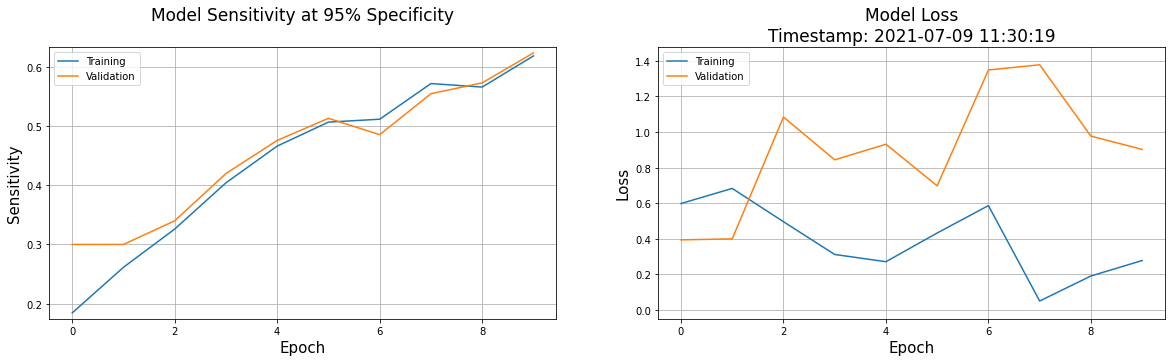

In [20]:
plot_performance(history=r)